In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow import keras
from tensorflow.keras import layers
from keras import initializers


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2024-02-26 11:53:48.260995: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-26 11:53:48.261145: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-26 11:53:48.382205: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input/assignmentimages/imagenette2-160.tgz


In [9]:
os.getcwd()

'/kaggle/working'

In [10]:
def count_files_in_subfolders(master_dir):
    # Dictionary to hold the count of files in each subfolder
    file_counts = {}

    # List all items in the master directory
    for subfolder in os.listdir(master_dir):
        subfolder_path = os.path.join(master_dir, subfolder)
        # Ensure the item is a directory
        if os.path.isdir(subfolder_path):
            # Count the number of files in this subfolder
            file_counts[subfolder] = len([name for name in os.listdir(subfolder_path) if os.path.isfile(os.path.join(subfolder_path, name))])

    return file_counts

# Define your master directory path
master_dir = '/kaggle/working/imagenette2-160/train'

# Get the file counts
file_counts = count_files_in_subfolders(master_dir)

# Print the counts
for subfolder, count in file_counts.items():
    print(f"{subfolder}: {count} files")

#Choose 6 classes, excluding n03000684 as i am lazy and want balanced classes

n01440764: 963 files
n03394916: 956 files
n03028079: 941 files
n02979186: 993 files
n03000684: 858 files
n03888257: 960 files
n03417042: 961 files
n02102040: 955 files
n03425413: 931 files
n03445777: 951 files


In [11]:
def count_files_in_subfolders(master_dir):
    # Dictionary to hold the count of files in each subfolder
    file_counts = {}

    # List all items in the master directory
    for subfolder in os.listdir(master_dir):
        subfolder_path = os.path.join(master_dir, subfolder)
        # Ensure the item is a directory
        if os.path.isdir(subfolder_path):
            # Count the number of files in this subfolder
            file_counts[subfolder] = len([name for name in os.listdir(subfolder_path) if os.path.isfile(os.path.join(subfolder_path, name))])

    return file_counts

# Define your master directory path
master_dir = '/kaggle/working/imagenette2-160/train'

# Get the file counts
file_counts = count_files_in_subfolders(master_dir)

# Print the counts
for subfolder, count in file_counts.items():
    print(f"{subfolder}: {count} files")

n01440764: 963 files
n03394916: 956 files
n03028079: 941 files
n02979186: 993 files
n03000684: 858 files
n03888257: 960 files
n03417042: 961 files
n02102040: 955 files
n03425413: 931 files
n03445777: 951 files


In [12]:
import shutil
def merge_datasets(train_dir, val_dir, master_dir):
    # Ensure the master directory exists
    if not os.path.exists(master_dir):
        os.makedirs(master_dir)

    # Process each dataset directory (train, val)
    for dataset_dir in [train_dir, val_dir]:
        # List all class directories in the current dataset directory
        for class_name in os.listdir(dataset_dir):
            class_dir_path = os.path.join(dataset_dir, class_name)
            # Skip if not a directory
            if not os.path.isdir(class_dir_path):
                continue

            # Ensure corresponding class directory exists in the master directory
            master_class_dir = os.path.join(master_dir, class_name)
            if not os.path.exists(master_class_dir):
                os.makedirs(master_class_dir)

            # Copy all images from this class to the master directory
            for image_name in os.listdir(class_dir_path):
                source_image_path = os.path.join(class_dir_path, image_name)
                destination_image_path = os.path.join(master_class_dir, image_name)

                # To avoid overwriting, check if the file already exists
                if not os.path.exists(destination_image_path):
                    shutil.copy2(source_image_path, destination_image_path)
                else:
                    print(f"Skipping {destination_image_path}, already exists.")

# Define your directory paths
train_dir = '/kaggle/working/imagenette2-160/train'
val_dir = '/kaggle/working/imagenette2-160/val'
master_dir = '/kaggle/working/imagenette2-160/master'

# Merge the datasets
merge_datasets(train_dir, val_dir, master_dir)

print("Merging completed.")

Merging completed.


In [13]:
def count_files_in_subfolders(master_dir):
    # Dictionary to hold the count of files in each subfolder
    file_counts = {}

    # List all items in the master directory
    for subfolder in os.listdir(master_dir):
        subfolder_path = os.path.join(master_dir, subfolder)
        # Ensure the item is a directory
        if os.path.isdir(subfolder_path):
            # Count the number of files in this subfolder
            file_counts[subfolder] = len([name for name in os.listdir(subfolder_path) if os.path.isfile(os.path.join(subfolder_path, name))])

    return file_counts

# Define your master directory path
master_dir = '/kaggle/working/imagenette2-160/master'

# Get the file counts
file_counts = count_files_in_subfolders(master_dir)

# Print the counts
for subfolder, count in file_counts.items():
    print(f"{subfolder}: {count} files")

n01440764: 1350 files
n03394916: 1350 files
n03028079: 1350 files
n02979186: 1350 files
n03000684: 1244 files
n03888257: 1350 files
n03417042: 1350 files
n02102040: 1350 files
n03425413: 1350 files
n03445777: 1350 files


In [15]:
pip install split-folders[full]

Note: you may need to restart the kernel to use updated packages.


In [16]:
import splitfolders
# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio("/kaggle/working/imagenette2-160/master", output="output",
    seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False) # default values


Copying files: 13394 files [00:01, 7261.36 files/s]


In [17]:
def count_files_in_subfolders(master_dir):
    # Dictionary to hold the count of files in each subfolder
    file_counts = {}

    # List all items in the master directory
    for subfolder in os.listdir(master_dir):
        subfolder_path = os.path.join(master_dir, subfolder)
        # Ensure the item is a directory
        if os.path.isdir(subfolder_path):
            # Count the number of files in this subfolder
            file_counts[subfolder] = len([name for name in os.listdir(subfolder_path) if os.path.isfile(os.path.join(subfolder_path, name))])

    return file_counts

# Define your master directory path
master_dir = '/kaggle/working/output/train'

# Get the file counts
file_counts = count_files_in_subfolders(master_dir)

# Print the counts
for subfolder, count in file_counts.items():
    print(f"{subfolder}: {count} files")

n01440764: 1080 files
n03394916: 1080 files
n03028079: 1080 files
n02979186: 1080 files
n03000684: 995 files
n03888257: 1080 files
n03417042: 1080 files
n02102040: 1080 files
n03425413: 1080 files
n03445777: 1080 files


In [18]:
classes_to_include = ['n03394916', 'n03888257','n02979186',' n03028079','n03425413','n02102040']

In [19]:
#Correcting any accidental leading/trailing whitespace in class names
classes_to_include = [cls.strip() for cls in classes_to_include]

In [ ]:
# subdirectories = [d for d in os.listdir('/kaggle/working/output/train') if os.path.isdir(os.path.join('/kaggle/working/output/train', d))]
# subdirectories

In [20]:
def get_subdirectories(directory):
    subdirectories = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]
    return subdirectories
# Test works
get_subdirectories("/kaggle/working/output/train")

['n01440764',
 'n03394916',
 'n03028079',
 'n02979186',
 'n03000684',
 'n03888257',
 'n03417042',
 'n02102040',
 'n03425413',
 'n03445777']

In [21]:
def include_subdirectories(directory, classes_to_include):
    sub_dir_list = get_subdirectories(directory)
    for c in sub_dir_list:
        # If the subdirectory is not in the list of classes to include
        if c not in classes_to_include:
            # Construct the path to the subdirectory
            dir_to_delete = os.path.join(directory, c)
            # Remove the subdirectory and all its contents
            shutil.rmtree(dir_to_delete)
            print(f"Deleted: {dir_to_delete}")
    

In [22]:
#  include_subdirectories('/kaggle/working/output/train', classes_to_include)

Deleted: /kaggle/working/output/train/n01440764
Deleted: /kaggle/working/output/train/n03000684
Deleted: /kaggle/working/output/train/n03417042
Deleted: /kaggle/working/output/train/n03445777


In [23]:
#  include_subdirectories('/kaggle/working/output/test', classes_to_include)

Deleted: /kaggle/working/output/test/n01440764
Deleted: /kaggle/working/output/test/n03000684
Deleted: /kaggle/working/output/test/n03417042
Deleted: /kaggle/working/output/test/n03445777


In [24]:
#  include_subdirectories('/kaggle/working/output/val', classes_to_include)

Deleted: /kaggle/working/output/val/n01440764
Deleted: /kaggle/working/output/val/n03000684
Deleted: /kaggle/working/output/val/n03417042
Deleted: /kaggle/working/output/val/n03445777


In [30]:

train_dataset = image_dataset_from_directory(
"/kaggle/working/output/train",
image_size=(64,64),
batch_size=32)

val_dataset = image_dataset_from_directory(
"/kaggle/working/output/val",
image_size=(64,64),
batch_size=32)

test_dataset = image_dataset_from_directory(
"/kaggle/working/output/test",
image_size=(64,64),
batch_size=32)

Found 6480 files belonging to 6 classes.
Found 810 files belonging to 6 classes.
Found 810 files belonging to 6 classes.


In [26]:
def count_files_in_subfolders(master_dir):
    # Dictionary to hold the count of files in each subfolder
    file_counts = {}

    # List all items in the master directory
    for subfolder in os.listdir(master_dir):
        subfolder_path = os.path.join(master_dir, subfolder)
        # Ensure the item is a directory
        if os.path.isdir(subfolder_path):
            # Count the number of files in this subfolder
            file_counts[subfolder] = len([name for name in os.listdir(subfolder_path) if os.path.isfile(os.path.join(subfolder_path, name))])

    return file_counts

# Define your master directory path
master_dir = '/kaggle/working/output/train'

# Get the file counts
file_counts = count_files_in_subfolders(master_dir)

# Print the counts
for subfolder, count in file_counts.items():
    print(f"{subfolder}: {count} files")

n03394916: 1080 files
n03028079: 1080 files
n02979186: 1080 files
n03888257: 1080 files
n02102040: 1080 files
n03425413: 1080 files


In [27]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import initializers

In [ ]:
#Desnse layer = "fully connected layer"
#Use Xavier uniform intializer (Glorot) for kernels -> From Keras docs this is GlorotUniform()
#From keras: Dilation rate int or tuple/list of 2 integers, specifying the dilation rate to use for dilated convolution.
# initializer = GlorotUniform()
inputs = keras.Input(shape=(64,64,3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters = 32,kernel_initializer='glorot_uniform', kernel_size=3,activation="relu",
                 dilation_rate=1, strides=(1, 1),)(x)
x = layers.Conv2D(filters = 32,kernel_initializer='glorot_uniform', kernel_size=3,activation="relu",
                 dilation_rate=1, strides=(1, 1),)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters = 64,kernel_initializer='glorot_uniform', kernel_size=3,activation="relu",
                 dilation_rate=1, strides=(1, 1),)(x)
x = layers.Conv2D(filters = 64,kernel_initializer='glorot_uniform', kernel_size=3,activation="relu",
                 dilation_rate=1, strides=(1, 1),)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512,activation="relu")(x)
outputs=layers.Dense(6, activation="softmax")(x) #Softmax as it is multiclass, single label classification Chollet Fig 6.1

basemodel = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
basemodel.summary()

In [ ]:
import tensorflow as tf
basemodel.compile(loss = 'sparse_categorical_crossentropy',
                 optimizer = "adam",
                 metrics =["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath ="convnet_from_scratch.keras",
    save_best_only=True,
    monitor="val_loss")
]


In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

In [ ]:
history = basemodel.fit(
train_dataset,
epochs=30,
validation_data=val_dataset,
callbacks = callbacks)

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs ,accuracy, "bo", label = "Training Accuracy")
plt.plot(epochs ,val_accuracy, "b", label = "Validation Accuracy")             
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label= "Training loss")
plt.plot(epochs, val_loss, "b", label=" Validation loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs ,accuracy, "bo", label = "Training Accuracy")
plt.plot(epochs ,val_accuracy, "b", label = "Validation Accuracy")             
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label= "Training loss")
plt.plot(epochs, val_loss, "b", label=" Validation loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

# **Trying Image Augmentation**

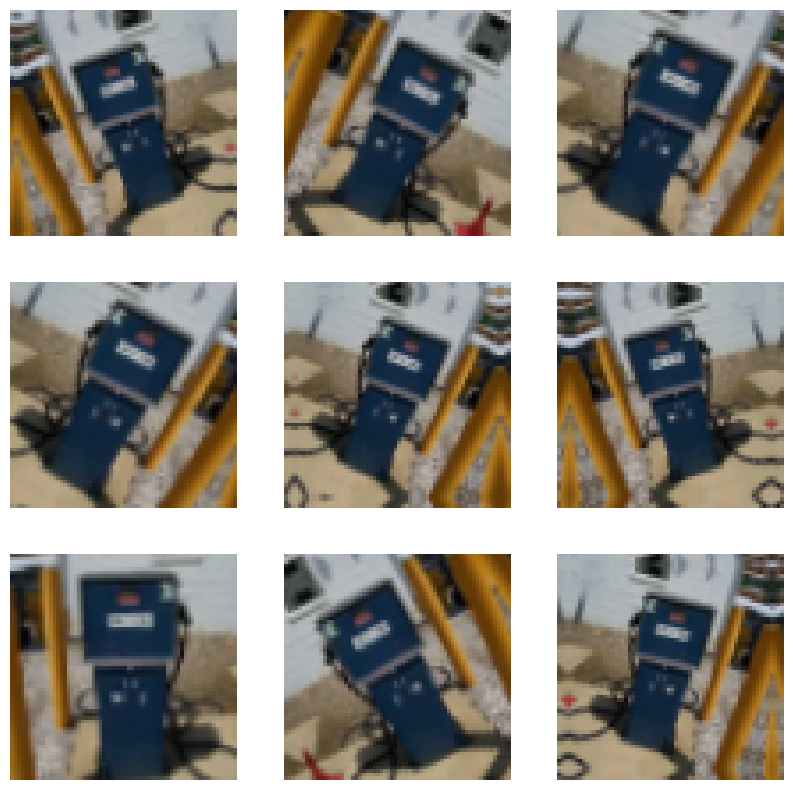

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


data_augmentation = keras.Sequential(
[layers.RandomFlip("horizontal"),
 layers.RandomRotation(0.1),
 layers.RandomZoom(0.2)]
)

plt.figure(figsize=(10,10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
# adding image augmentation no change to rest of architecture
inputs = keras.Input(shape=(64,64,3))
#x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters = 32,kernel_initializer='glorot_uniform', kernel_size=3,activation="relu",
                 dilation_rate=1, strides=(1, 1),)(x)
x = layers.Conv2D(filters = 32,kernel_initializer='glorot_uniform', kernel_size=3,activation="relu",
                 dilation_rate=1, strides=(1, 1),)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters = 64,kernel_initializer='glorot_uniform', kernel_size=3,activation="relu",
                 dilation_rate=1, strides=(1, 1),)(x)
x = layers.Conv2D(filters = 64,kernel_initializer='glorot_uniform', kernel_size=3,activation="relu",
                 dilation_rate=1, strides=(1, 1),)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512,activation="relu")(x)
outputs=layers.Dense(6, activation="softmax")(x) #Softmax as it is multiclass, single label classification Chollet Fig 6.1

model2 = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model2.summary()

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

In [ ]:
import tensorflow as tf
model2.compile(loss = 'sparse_categorical_crossentropy',
                 optimizer = "adam",
                 metrics =["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath ="convnet_from_scratch2_2.keras",
    save_best_only=True,
    monitor="val_loss")
]
history = model2.fit(
train_dataset,
epochs=30,
validation_data=val_dataset,
callbacks = callbacks)

In [ ]:
history = model2.fit(
train_dataset,
epochs=30,
validation_data=val_dataset,
callbacks = callbacks)

Drops in performance after epoch 19, in the 25th its pretty much rtandom

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs ,accuracy, "bo", label = "Training Accuracy")
plt.plot(epochs ,val_accuracy, "b", label = "Validation Accuracy")             
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label= "Training loss")
plt.plot(epochs, val_loss, "b", label=" Validation loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

val_images, val_labels = next(iter(val_dataset.unbatch().batch(len(val_dataset))))
predictions = model2.predict(val_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = val_labels.numpy()

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Calculate per-class accuracy
per_class_accuracy = cm.diagonal() / cm.sum(axis=1)
for idx, acc in enumerate(per_class_accuracy):
    print(f"Class {idx} accuracy: {acc*100:.2f}%")

In [ ]:
from tensorflow.keras.models import load_model
model2metric = load_model("convnet_from_scratch2_2.keras")

MODEL 3: Augmentation made performance worse to where it was predicting every class as class 4

Revisiting augmentation to investigate whats happening

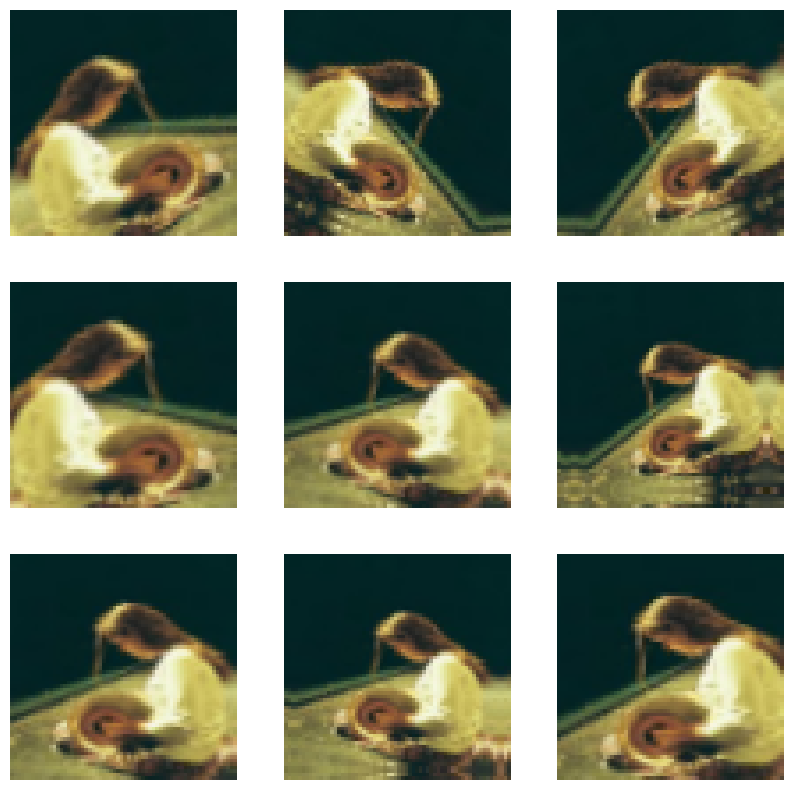

In [22]:
data_augmentation = keras.Sequential(
[layers.RandomFlip("horizontal"),
 layers.RandomRotation(0.1),
 layers.RandomZoom(0.2)]
)

plt.figure(figsize=(10,10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [28]:
#Want to get example of each class to see what they look like
#Want to be able to resuse code after augmentation
#Write funcitons to do this
train_dataset = tf.keras.utils.image_dataset_from_directory(
    "/kaggle/working/output/train",
    image_size=(64, 64),
    batch_size=32,
    shuffle=True,
    seed=42
)

def filter_class(images, labels, class_index):
    return tf.equal(labels, class_index)

def apply_filter(dataset, class_index):
    filtered_dataset = dataset.unbatch().filter(lambda image, label: filter_class(image, label, class_index)).batch(3)
    return filtered_dataset

def make_plot_data_set_viz(filtered_dataset, class_index):
    plt.figure(figsize=(10, 10))
    for images, labels in filtered_dataset.take(1):
        for i in range(3):  # Looping through 3 examples
            ax = plt.subplot(1, 3, i + 1)  # Adjust subplot for a row of 3 images
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(f'Class {class_index}')
            plt.axis("off")
    plt.show()

def filter_and_plot_class_tfdataset(dataset, class_index):
    # Apply the filter
    filtered_dataset = apply_filter(dataset, class_index)
    # Make plot
    make_plot_data_set_viz(filtered_dataset, class_index)




Found 6480 files belonging to 6 classes.


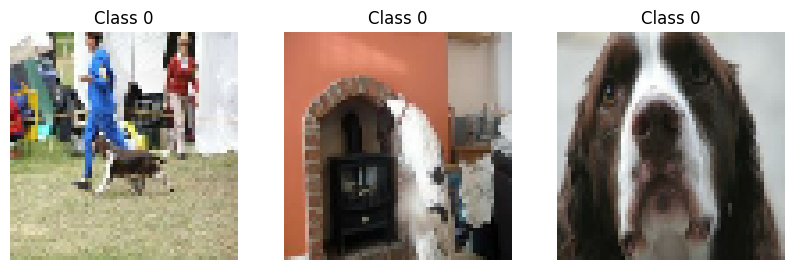

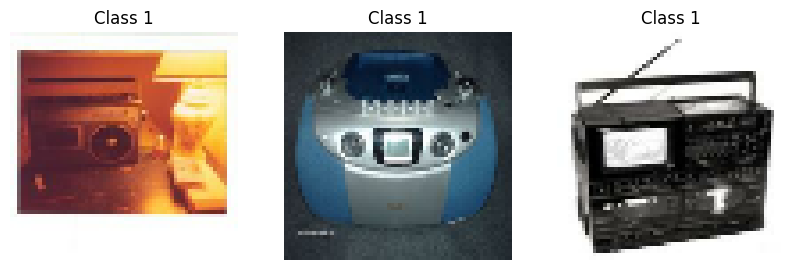

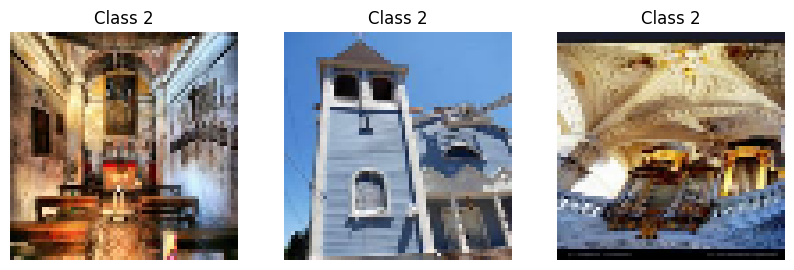

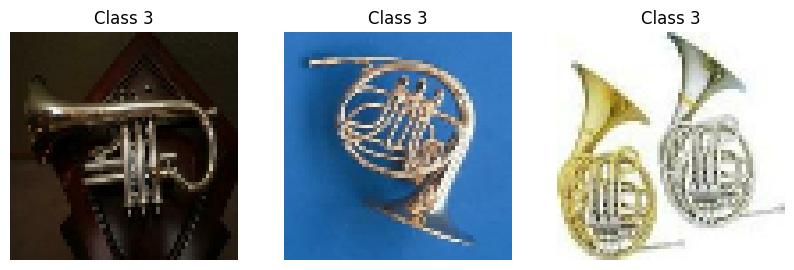

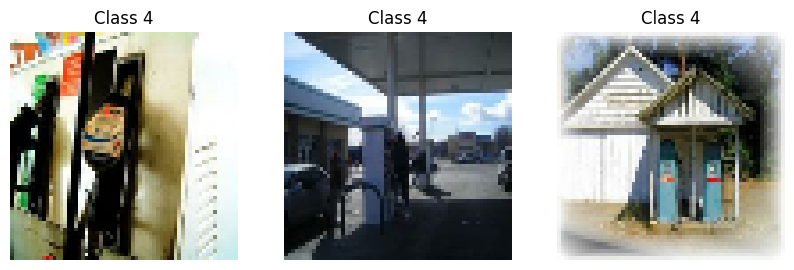

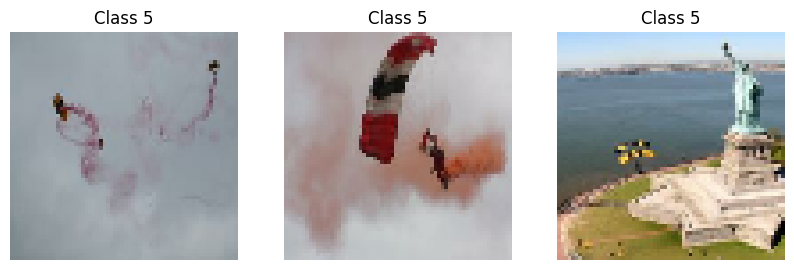

In [29]:
for x in range(6):
    filter_and_plot_class_tfdataset(train_dataset,x)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


data_augmentation = keras.Sequential(
[layers.RandomFlip("horizontal")
 #layers.RandomRotation(0.1),
 #layers.RandomZoom(0.2)
]
)



In [ ]:
# adding image augmentation no change to rest of architecture
inputs = keras.Input(shape=(64,64,3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters = 32,kernel_initializer='glorot_uniform', kernel_size=3,activation="relu",
                 dilation_rate=1, strides=(1, 1),)(x)
x = layers.Conv2D(filters = 32,kernel_initializer='glorot_uniform', kernel_size=3,activation="relu",
                 dilation_rate=1, strides=(1, 1),)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters = 64,kernel_initializer='glorot_uniform', kernel_size=3,activation="relu",
                 dilation_rate=1, strides=(1, 1),)(x)
x = layers.Conv2D(filters = 64,kernel_initializer='glorot_uniform', kernel_size=3,activation="relu",
                 dilation_rate=1, strides=(1, 1),)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512,activation="relu")(x)
outputs=layers.Dense(6, activation="softmax")(x) #Softmax as it is multiclass, single label classification Chollet Fig 6.1

model3 = keras.Model(inputs=inputs, outputs=outputs)

model3.compile(loss = 'sparse_categorical_crossentropy',
                 optimizer = "adam",
                 metrics =["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath ="convnet_from_scratch2_2.keras",
    save_best_only=True,
    monitor="val_loss"),
     keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        patience=3,  # Number of epochs with no improvement after which training will be stopped
        restore_best_weights=True
    )
]

history = model3.fit(
train_dataset,
epochs=30,
validation_data=val_dataset,
callbacks = callbacks)

In [ ]:
import tensorflow as tf
model3.compile(loss = 'sparse_categorical_crossentropy',
                 optimizer = "adam",
                 metrics =["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath ="convnet_from_scratch2_2.keras",
    save_best_only=True,
    monitor="val_loss"),
     keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        patience=3,  # Number of epochs with no improvement after which training will be stopped
        restore_best_weights=True
    )
]

history = model3.fit(
train_dataset,
epochs=30,
validation_data=val_dataset,
callbacks = callbacks)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

val_images, val_labels = next(iter(val_dataset.unbatch().batch(len(val_dataset))))
predictions = model3.predict(val_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = val_labels.numpy()

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Calculate per-class accuracy
per_class_accuracy = cm.diagonal() / cm.sum(axis=1)
for idx, acc in enumerate(per_class_accuracy):
    print(f"Class {idx} accuracy: {acc*100:.2f}%")

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs ,accuracy, "bo", label = "Training Accuracy")
plt.plot(epochs ,val_accuracy, "b", label = "Validation Accuracy")             
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label= "Training loss")
plt.plot(epochs, val_loss, "b", label=" Validation loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

**Model 4**

In [ ]:
data_augmentation = keras.Sequential(
[layers.RandomFlip("horizontal")
 layers.RandomRotation(0.1),
 layers.RandomZoom(0.2)
]
)

In [ ]:
# adding image augmentation no change to rest of architecture
inputs = keras.Input(shape=(64,64,3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters = 32,kernel_initializer='glorot_uniform', kernel_size=3,activation="relu",
                 dilation_rate=1, strides=(1, 1),)(x)
x = layers.Conv2D(filters = 32,kernel_initializer='glorot_uniform', kernel_size=3,activation="relu",
                 dilation_rate=1, strides=(1, 1),)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters = 64,kernel_initializer='glorot_uniform', kernel_size=3,activation="relu",
                 dilation_rate=1, strides=(1, 1),)(x)
x = layers.Conv2D(filters = 64,kernel_initializer='glorot_uniform', kernel_size=3,activation="relu",
                 dilation_rate=1, strides=(1, 1),)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512,activation="relu")(x)
outputs=layers.Dense(6, activation="softmax")(x) #Softmax as it is multiclass, single label classification Chollet Fig 6.1

model4 = keras.Model(inputs=inputs, outputs=outputs)

model4.compile(loss = 'sparse_categorical_crossentropy',
                 optimizer = "adam",
                 metrics =["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath ="convnet_from_scratch4.keras",
    save_best_only=True,
    monitor="val_loss"),
     keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        patience=3,  # Number of epochs with no improvement after which training will be stopped
        restore_best_weights=True
    )
]

history = model4.fit(
train_dataset,
epochs=30,
validation_data=val_dataset,
callbacks = callbacks)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

val_images, val_labels = next(iter(val_dataset.unbatch().batch(len(val_dataset))))
predictions = model3.predict(val_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = val_labels.numpy()

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Calculate per-class accuracy
per_class_accuracy = cm.diagonal() / cm.sum(axis=1)
for idx, acc in enumerate(per_class_accuracy):
    print(f"Class {idx} accuracy: {acc*100:.2f}%")

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs ,accuracy, "bo", label = "Training Accuracy")
plt.plot(epochs ,val_accuracy, "b", label = "Validation Accuracy")             
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label= "Training loss")
plt.plot(epochs, val_loss, "b", label=" Validation loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
data_augmentation = keras.Sequential(
[layers.RandomFlip("horizontal"),
 layers.RandomRotation(0.1),
 layers.RandomZoom(0.2)
]
)

In [ ]:
# adding image augmentation no change to rest of architecture
inputs = keras.Input(shape=(64,64,3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters = 32,kernel_initializer='glorot_uniform', kernel_size=3,activation="relu",
                 dilation_rate=1, strides=(1, 1),)(x)
x = layers.Conv2D(filters = 32,kernel_initializer='glorot_uniform', kernel_size=3,activation="relu",
                 dilation_rate=1, strides=(1, 1),)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters = 64,kernel_initializer='glorot_uniform', kernel_size=3,activation="relu",
                 dilation_rate=1, strides=(1, 1),)(x)
x = layers.Conv2D(filters = 64,kernel_initializer='glorot_uniform', kernel_size=3,activation="relu",
                 dilation_rate=1, strides=(1, 1),)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512,activation="relu")(x)
outputs=layers.Dense(6, activation="softmax")(x) #Softmax as it is multiclass, single label classification Chollet Fig 6.1

model5 = keras.Model(inputs=inputs, outputs=outputs)

model5.compile(loss = 'sparse_categorical_crossentropy',
                 optimizer = "adam",
                 metrics =["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath ="convnet_from_scratch5.keras",
    save_best_only=True,
    monitor="val_loss"),
     keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        patience=3,  # Number of epochs with no improvement after which training will be stopped
        restore_best_weights=True
    )
]

history = model5.fit(
train_dataset,
epochs=30,
validation_data=val_dataset,
callbacks = callbacks)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

val_images, val_labels = next(iter(val_dataset.unbatch().batch(len(val_dataset))))
predictions = model5.predict(val_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = val_labels.numpy()

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Calculate per-class accuracy
per_class_accuracy = cm.diagonal() / cm.sum(axis=1)
for idx, acc in enumerate(per_class_accuracy):
    print(f"Class {idx} accuracy: {acc*100:.2f}%")

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs ,accuracy, "bo", label = "Training Accuracy")
plt.plot(epochs ,val_accuracy, "b", label = "Validation Accuracy")             
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label= "Training loss")
plt.plot(epochs, val_loss, "b", label=" Validation loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

**Model 5**

In [31]:
data_augmentation = keras.Sequential(
[layers.RandomFlip("horizontal"),
 layers.RandomRotation(0.1),
 layers.RandomZoom(0.2),
]
)

In [ ]:
# adding batch normalisation: Following Chollet 9.5 remove activation from layer add after BN add use_bias=False
inputs = keras.Input(shape=(64,64,3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters = 32,kernel_initializer='glorot_uniform', kernel_size=3,
                 dilation_rate=1, strides=(1, 1), use_bias = False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.Conv2D(filters = 32,kernel_initializer='glorot_uniform', kernel_size=3,
                 dilation_rate=1, strides=(1, 1),use_bias = False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters = 64,kernel_initializer='glorot_uniform', kernel_size=3,
                 dilation_rate=1, strides=(1, 1),use_bias = False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.Conv2D(filters = 64,kernel_initializer='glorot_uniform', kernel_size=3,
                 dilation_rate=1, strides=(1, 1),use_bias = False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512,activation="relu")(x)
outputs=layers.Dense(6, activation="softmax")(x) #Softmax as it is multiclass, single label classification Chollet Fig 6.1

model6 = keras.Model(inputs=inputs, outputs=outputs)

model6.compile(loss = 'sparse_categorical_crossentropy',
                 optimizer = "adam",
                 metrics =["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath ="convnet_from_scratch6.keras",
    save_best_only=True,
    monitor="val_loss"),
     keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        patience=3,  # Number of epochs with no improvement after which training will be stopped
        restore_best_weights=True
    )
]

history = model6.fit(
train_dataset,
epochs=30,
validation_data=val_dataset,
callbacks = callbacks)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

val_images, val_labels = next(iter(val_dataset.unbatch().batch(len(val_dataset))))
predictions = model6.predict(val_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = val_labels.numpy()

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Calculate per-class accuracy
per_class_accuracy = cm.diagonal() / cm.sum(axis=1)
for idx, acc in enumerate(per_class_accuracy):
    print(f"Class {idx} accuracy: {acc*100:.2f}%")

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs ,accuracy, "bo", label = "Training Accuracy")
plt.plot(epochs ,val_accuracy, "b", label = "Validation Accuracy")             
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label= "Training loss")
plt.plot(epochs, val_loss, "b", label=" Validation loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

Model 6: Dropout 0.4

In [32]:
# adding batch normalisation: Following Chollet 9.5 remove activation from layer add after BN add use_bias=False
inputs = keras.Input(shape=(64,64,3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters = 32,kernel_initializer='glorot_uniform', kernel_size=3,
                 dilation_rate=1, strides=(1, 1), use_bias = False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.Conv2D(filters = 32,kernel_initializer='glorot_uniform', kernel_size=3,
                 dilation_rate=1, strides=(1, 1),use_bias = False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters = 64,kernel_initializer='glorot_uniform', kernel_size=3,
                 dilation_rate=1, strides=(1, 1),use_bias = False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.Conv2D(filters = 64,kernel_initializer='glorot_uniform', kernel_size=3,
                 dilation_rate=1, strides=(1, 1),use_bias = False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512,activation="relu")(x)
x = layers.Dropout(0.4)(x)
outputs=layers.Dense(6, activation="softmax")(x) #Softmax as it is multiclass, single label classification Chollet Fig 6.1

model7 = keras.Model(inputs=inputs, outputs=outputs)

model7.compile(loss = 'sparse_categorical_crossentropy',
                 optimizer = "adam",
                 metrics =["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath ="convnet_from_scratch7.keras",
    save_best_only=True,
    monitor="val_loss"),
     keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        patience=3,  # Number of epochs with no improvement after which training will be stopped
        restore_best_weights=True
    )
]

history = model7.fit(
train_dataset,
epochs=30,
validation_data=val_dataset,
callbacks = callbacks)

Epoch 1/30


I0000 00:00:1708948813.068916     162 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


203/203 [==============================] - 9s 15ms/step - loss: 2.7008 - accuracy: 0.4417 - val_loss: 1.7507 - val_accuracy: 0.2765
Epoch 2/30
203/203 [==============================] - 2s 11ms/step - loss: 1.1817 - accuracy: 0.5591 - val_loss: 1.3261 - val_accuracy: 0.4790
Epoch 3/30
203/203 [==============================] - 2s 9ms/step - loss: 1.0199 - accuracy: 0.6231 - val_loss: 1.8577 - val_accuracy: 0.3753
Epoch 4/30
203/203 [==============================] - 2s 9ms/step - loss: 0.9143 - accuracy: 0.6755 - val_loss: 1.5316 - val_accuracy: 0.5247
Epoch 5/30
203/203 [==============================] - 2s 11ms/step - loss: 0.8281 - accuracy: 0.7156 - val_loss: 1.1000 - val_accuracy: 0.6296
Epoch 6/30
203/203 [==============================] - 2s 10ms/step - loss: 0.7492 - accuracy: 0.7400 - val_loss: 1.6352 - val_accuracy: 0.5358
Epoch 7/30
203/203 [==============================] - 2s 12ms/step - loss: 0.6851 - accuracy: 0.7660 - val_loss: 0.9011 - val_accuracy: 0.6827
Epoch 8/30
2

**Model 7: Dropout 0.6**

In [33]:
# adding batch normalisation: Following Chollet 9.5 remove activation from layer add after BN add use_bias=False
inputs = keras.Input(shape=(64,64,3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters = 32,kernel_initializer='glorot_uniform', kernel_size=3,
                 dilation_rate=1, strides=(1, 1), use_bias = False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.Conv2D(filters = 32,kernel_initializer='glorot_uniform', kernel_size=3,
                 dilation_rate=1, strides=(1, 1),use_bias = False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters = 64,kernel_initializer='glorot_uniform', kernel_size=3,
                 dilation_rate=1, strides=(1, 1),use_bias = False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.Conv2D(filters = 64,kernel_initializer='glorot_uniform', kernel_size=3,
                 dilation_rate=1, strides=(1, 1),use_bias = False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512,activation="relu")(x)
x = layers.Dropout(0.6)(x)
outputs=layers.Dense(6, activation="softmax")(x) #Softmax as it is multiclass, single label classification Chollet Fig 6.1

model8 = keras.Model(inputs=inputs, outputs=outputs)

model8.compile(loss = 'sparse_categorical_crossentropy',
                 optimizer = "adam",
                 metrics =["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath ="convnet_from_scratch7.keras",
    save_best_only=True,
    monitor="val_loss"),
     keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        patience=3,  # Number of epochs with no improvement after which training will be stopped
        restore_best_weights=True
    )
]

history = model8.fit(
train_dataset,
epochs=30,
validation_data=val_dataset,
callbacks = callbacks)

Epoch 1/30
203/203 [==============================] - 5s 12ms/step - loss: 2.3485 - accuracy: 0.4204 - val_loss: 2.4109 - val_accuracy: 0.1667
Epoch 2/30
203/203 [==============================] - 2s 11ms/step - loss: 1.2612 - accuracy: 0.5253 - val_loss: 1.3608 - val_accuracy: 0.4951
Epoch 3/30
203/203 [==============================] - 2s 9ms/step - loss: 1.1083 - accuracy: 0.5980 - val_loss: 1.3753 - val_accuracy: 0.4593
Epoch 4/30
203/203 [==============================] - 2s 9ms/step - loss: 0.9984 - accuracy: 0.6432 - val_loss: 1.4269 - val_accuracy: 0.5185
Epoch 5/30
203/203 [==============================] - 2s 11ms/step - loss: 0.9045 - accuracy: 0.6852 - val_loss: 1.3020 - val_accuracy: 0.5938
Epoch 6/30
203/203 [==============================] - 2s 11ms/step - loss: 0.8855 - accuracy: 0.6904 - val_loss: 1.1137 - val_accuracy: 0.6778
Epoch 7/30
203/203 [==============================] - 2s 11ms/step - loss: 0.8141 - accuracy: 0.7256 - val_loss: 0.8389 - val_accuracy: 0.7074
E

**Experiment with different optimiser**  RMS prop 

In [35]:
# adding batch normalisation: Following Chollet 9.5 remove activation from layer add after BN add use_bias=False
inputs = keras.Input(shape=(64,64,3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters = 32,kernel_initializer='glorot_uniform', kernel_size=3,
                 dilation_rate=1, strides=(1, 1), use_bias = False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.Conv2D(filters = 32,kernel_initializer='glorot_uniform', kernel_size=3,
                 dilation_rate=1, strides=(1, 1),use_bias = False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters = 64,kernel_initializer='glorot_uniform', kernel_size=3,
                 dilation_rate=1, strides=(1, 1),use_bias = False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.Conv2D(filters = 64,kernel_initializer='glorot_uniform', kernel_size=3,
                 dilation_rate=1, strides=(1, 1),use_bias = False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512,activation="relu")(x)
x = layers.Dropout(0.4)(x)
outputs=layers.Dense(6, activation="softmax")(x) #Softmax as it is multiclass, single label classification Chollet Fig 6.1

model8 = keras.Model(inputs=inputs, outputs=outputs)

model8.compile(loss = 'sparse_categorical_crossentropy',
                 optimizer = "rmsprop",
                 metrics =["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath ="convnet_from_scratch8.keras",
    save_best_only=True,
    monitor="val_loss"),
     keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        patience=3,  # Number of epochs with no improvement after which training will be stopped
        restore_best_weights=True
    )
]

history = model8.fit(
train_dataset,
epochs=30,
validation_data=val_dataset,
callbacks = callbacks)

Epoch 1/30
203/203 [==============================] - 4s 11ms/step - loss: 2.5950 - accuracy: 0.4227 - val_loss: 1.7077 - val_accuracy: 0.2667
Epoch 2/30
203/203 [==============================] - 2s 10ms/step - loss: 1.1242 - accuracy: 0.6049 - val_loss: 1.2485 - val_accuracy: 0.5160
Epoch 3/30
203/203 [==============================] - 2s 10ms/step - loss: 0.9208 - accuracy: 0.6894 - val_loss: 1.0579 - val_accuracy: 0.6407
Epoch 4/30
203/203 [==============================] - 2s 10ms/step - loss: 0.8107 - accuracy: 0.7227 - val_loss: 1.0448 - val_accuracy: 0.6444
Epoch 5/30
203/203 [==============================] - 2s 9ms/step - loss: 0.7563 - accuracy: 0.7477 - val_loss: 1.9442 - val_accuracy: 0.5321
Epoch 6/30
203/203 [==============================] - 2s 9ms/step - loss: 0.7137 - accuracy: 0.7606 - val_loss: 1.1268 - val_accuracy: 0.6346
Epoch 7/30
203/203 [==============================] - 2s 11ms/step - loss: 0.6372 - accuracy: 0.7880 - val_loss: 1.0239 - val_accuracy: 0.7148
E

In [36]:
initial_learning_rate = 0.1
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

In [38]:
# adding batch normalisation: Following Chollet 9.5 remove activation from layer add after BN add use_bias=False
inputs = keras.Input(shape=(64,64,3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters = 32,kernel_initializer='glorot_uniform', kernel_size=3,
                 dilation_rate=1, strides=(1, 1), use_bias = False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.Conv2D(filters = 32,kernel_initializer='glorot_uniform', kernel_size=3,
                 dilation_rate=1, strides=(1, 1),use_bias = False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters = 64,kernel_initializer='glorot_uniform', kernel_size=3,
                 dilation_rate=1, strides=(1, 1),use_bias = False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.Conv2D(filters = 64,kernel_initializer='glorot_uniform', kernel_size=3,
                 dilation_rate=1, strides=(1, 1),use_bias = False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512,activation="relu")(x)
x = layers.Dropout(0.4)(x)
outputs=layers.Dense(6, activation="softmax")(x) #Softmax as it is multiclass, single label classification Chollet Fig 6.1

model9 = keras.Model(inputs=inputs, outputs=outputs)

model9.compile(loss = 'sparse_categorical_crossentropy',
                 optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule),
                 metrics =["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath ="convnet_from_scratch9.keras",
    save_best_only=True,
    monitor="val_loss"),
     keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        patience=3,  # Number of epochs with no improvement after which training will be stopped
        restore_best_weights=True
    )
]

history = model9.fit(
train_dataset,
epochs=30,
validation_data=val_dataset,
callbacks = callbacks)

Epoch 1/30
203/203 [==============================] - 4s 11ms/step - loss: 2.5634 - accuracy: 0.4052 - val_loss: 1.4054 - val_accuracy: 0.4593
Epoch 2/30
203/203 [==============================] - 2s 10ms/step - loss: 1.2374 - accuracy: 0.5326 - val_loss: 1.1741 - val_accuracy: 0.5679
Epoch 3/30
203/203 [==============================] - 2s 10ms/step - loss: 1.0932 - accuracy: 0.5927 - val_loss: 1.1485 - val_accuracy: 0.5790
Epoch 4/30
203/203 [==============================] - 2s 9ms/step - loss: 0.9962 - accuracy: 0.6353 - val_loss: 1.2991 - val_accuracy: 0.5704
Epoch 5/30
203/203 [==============================] - 2s 9ms/step - loss: 0.8766 - accuracy: 0.6812 - val_loss: 1.9633 - val_accuracy: 0.4111
Epoch 6/30
203/203 [==============================] - 2s 10ms/step - loss: 0.7801 - accuracy: 0.7184 - val_loss: 0.9678 - val_accuracy: 0.6506
Epoch 7/30
203/203 [==============================] - 2s 10ms/step - loss: 0.6930 - accuracy: 0.7508 - val_loss: 0.9082 - val_accuracy: 0.6556
E

In [39]:
initial_learning_rate = 0.1
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=False)
# adding batch normalisation: Following Chollet 9.5 remove activation from layer add after BN add use_bias=False
inputs = keras.Input(shape=(64,64,3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters = 32,kernel_initializer='glorot_uniform', kernel_size=3,
                 dilation_rate=1, strides=(1, 1), use_bias = False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.Conv2D(filters = 32,kernel_initializer='glorot_uniform', kernel_size=3,
                 dilation_rate=1, strides=(1, 1),use_bias = False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters = 64,kernel_initializer='glorot_uniform', kernel_size=3,
                 dilation_rate=1, strides=(1, 1),use_bias = False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.Conv2D(filters = 64,kernel_initializer='glorot_uniform', kernel_size=3,
                 dilation_rate=1, strides=(1, 1),use_bias = False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512,activation="relu")(x)
x = layers.Dropout(0.4)(x)
outputs=layers.Dense(6, activation="softmax")(x) #Softmax as it is multiclass, single label classification Chollet Fig 6.1

model10 = keras.Model(inputs=inputs, outputs=outputs)

model10.compile(loss = 'sparse_categorical_crossentropy',
                 optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule),
                 metrics =["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath ="convnet_from_scratch9.keras",
    save_best_only=True,
    monitor="val_loss"),
     keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        patience=3,  # Number of epochs with no improvement after which training will be stopped
        restore_best_weights=True
    )
]

history = model10.fit(
train_dataset,
epochs=30,
validation_data=val_dataset,
callbacks = callbacks)

Epoch 1/30
203/203 [==============================] - 4s 11ms/step - loss: 2.0694 - accuracy: 0.3799 - val_loss: 1.9829 - val_accuracy: 0.2222
Epoch 2/30
203/203 [==============================] - 2s 10ms/step - loss: 1.2903 - accuracy: 0.5119 - val_loss: 1.6616 - val_accuracy: 0.3716
Epoch 3/30
203/203 [==============================] - 2s 10ms/step - loss: 1.1476 - accuracy: 0.5790 - val_loss: 1.1826 - val_accuracy: 0.5617
Epoch 4/30
203/203 [==============================] - 2s 10ms/step - loss: 1.0244 - accuracy: 0.6276 - val_loss: 0.9783 - val_accuracy: 0.6481
Epoch 5/30
203/203 [==============================] - 2s 10ms/step - loss: 0.8652 - accuracy: 0.6940 - val_loss: 0.9735 - val_accuracy: 0.6654
Epoch 6/30
203/203 [==============================] - 2s 9ms/step - loss: 0.7471 - accuracy: 0.7392 - val_loss: 3.8399 - val_accuracy: 0.3136
Epoch 7/30
203/203 [==============================] - 2s 9ms/step - loss: 0.6275 - accuracy: 0.7903 - val_loss: 1.3173 - val_accuracy: 0.5691
E

In [41]:
initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)
# adding batch normalisation: Following Chollet 9.5 remove activation from layer add after BN add use_bias=False
inputs = keras.Input(shape=(64,64,3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters = 32,kernel_initializer='glorot_uniform', kernel_size=3,
                 dilation_rate=1, strides=(1, 1), use_bias = False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.Conv2D(filters = 32,kernel_initializer='glorot_uniform', kernel_size=3,
                 dilation_rate=1, strides=(1, 1),use_bias = False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters = 64,kernel_initializer='glorot_uniform', kernel_size=3,
                 dilation_rate=1, strides=(1, 1),use_bias = False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.Conv2D(filters = 64,kernel_initializer='glorot_uniform', kernel_size=3,
                 dilation_rate=1, strides=(1, 1),use_bias = False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512,activation="relu")(x)
x = layers.Dropout(0.4)(x)
outputs=layers.Dense(6, activation="softmax")(x) #Softmax as it is multiclass, single label classification Chollet Fig 6.1

model11 = keras.Model(inputs=inputs, outputs=outputs)

model11.compile(loss = 'sparse_categorical_crossentropy',
                 optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule),
                 metrics =["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath ="convnet_from_scratch11.keras",
    save_best_only=True,
    monitor="val_loss"),
     keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        patience=3,  # Number of epochs with no improvement after which training will be stopped
        restore_best_weights=True
    )
]

history = model11.fit(
train_dataset,
epochs=30,
validation_data=val_dataset,
callbacks = callbacks)

Epoch 1/30
203/203 [==============================] - 4s 12ms/step - loss: 1.4053 - accuracy: 0.4929 - val_loss: 1.9664 - val_accuracy: 0.1679
Epoch 2/30
203/203 [==============================] - 2s 10ms/step - loss: 0.9493 - accuracy: 0.6502 - val_loss: 1.1633 - val_accuracy: 0.5494
Epoch 3/30
203/203 [==============================] - 2s 10ms/step - loss: 0.7664 - accuracy: 0.7252 - val_loss: 0.9333 - val_accuracy: 0.6716
Epoch 4/30
203/203 [==============================] - 2s 9ms/step - loss: 0.6482 - accuracy: 0.7715 - val_loss: 1.0037 - val_accuracy: 0.6778
Epoch 5/30
203/203 [==============================] - 2s 10ms/step - loss: 0.5581 - accuracy: 0.8025 - val_loss: 0.8729 - val_accuracy: 0.7136
Epoch 6/30
203/203 [==============================] - 2s 9ms/step - loss: 0.4799 - accuracy: 0.8324 - val_loss: 0.9263 - val_accuracy: 0.7111
Epoch 7/30
203/203 [==============================] - 2s 9ms/step - loss: 0.4125 - accuracy: 0.8600 - val_loss: 0.8953 - val_accuracy: 0.7012
Ep

In [42]:
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)
# adding batch normalisation: Following Chollet 9.5 remove activation from layer add after BN add use_bias=False
inputs = keras.Input(shape=(64,64,3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters = 32,kernel_initializer='glorot_uniform', kernel_size=3,
                 dilation_rate=1, strides=(1, 1), use_bias = False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.Conv2D(filters = 32,kernel_initializer='glorot_uniform', kernel_size=3,
                 dilation_rate=1, strides=(1, 1),use_bias = False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters = 64,kernel_initializer='glorot_uniform', kernel_size=3,
                 dilation_rate=1, strides=(1, 1),use_bias = False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.Conv2D(filters = 64,kernel_initializer='glorot_uniform', kernel_size=3,
                 dilation_rate=1, strides=(1, 1),use_bias = False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512,activation="relu")(x)
x = layers.Dropout(0.4)(x)
outputs=layers.Dense(6, activation="softmax")(x) #Softmax as it is multiclass, single label classification Chollet Fig 6.1

model12 = keras.Model(inputs=inputs, outputs=outputs)

model12.compile(loss = 'sparse_categorical_crossentropy',
                 optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule),
                 metrics =["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath ="convnet_from_scratch11.keras",
    save_best_only=True,
    monitor="val_loss"),
     keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        patience=3,  # Number of epochs with no improvement after which training will be stopped
        restore_best_weights=True
    )
]

history = model12.fit(
train_dataset,
epochs=30,
validation_data=val_dataset,
callbacks = callbacks)

Epoch 1/30
203/203 [==============================] - 4s 12ms/step - loss: 1.6156 - accuracy: 0.3997 - val_loss: 1.9185 - val_accuracy: 0.1728
Epoch 2/30
203/203 [==============================] - 2s 10ms/step - loss: 1.1904 - accuracy: 0.5503 - val_loss: 1.4081 - val_accuracy: 0.4568
Epoch 3/30
203/203 [==============================] - 2s 10ms/step - loss: 1.0610 - accuracy: 0.6071 - val_loss: 1.0921 - val_accuracy: 0.5901
Epoch 4/30
203/203 [==============================] - 2s 10ms/step - loss: 0.9505 - accuracy: 0.6529 - val_loss: 0.9921 - val_accuracy: 0.6420
Epoch 5/30
203/203 [==============================] - 2s 10ms/step - loss: 0.8729 - accuracy: 0.6846 - val_loss: 0.9787 - val_accuracy: 0.6420
Epoch 6/30
203/203 [==============================] - 2s 9ms/step - loss: 0.8092 - accuracy: 0.7184 - val_loss: 1.0133 - val_accuracy: 0.6272
Epoch 7/30
203/203 [==============================] - 2s 10ms/step - loss: 0.7526 - accuracy: 0.7309 - val_loss: 0.9046 - val_accuracy: 0.6790


In [43]:
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)
# adding batch normalisation: Following Chollet 9.5 remove activation from layer add after BN add use_bias=False
inputs = keras.Input(shape=(64,64,3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters = 32,kernel_initializer='glorot_uniform', kernel_size=3,
                 dilation_rate=1, strides=(1, 1), use_bias = False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.Conv2D(filters = 32,kernel_initializer='glorot_uniform', kernel_size=3,
                 dilation_rate=1, strides=(1, 1),use_bias = False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters = 64,kernel_initializer='glorot_uniform', kernel_size=3,
                 dilation_rate=1, strides=(1, 1),use_bias = False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.Conv2D(filters = 64,kernel_initializer='glorot_uniform', kernel_size=3,
                 dilation_rate=1, strides=(1, 1),use_bias = False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512,activation="relu")(x)
x = layers.Dropout(0.4)(x)
outputs=layers.Dense(6, activation="softmax")(x) #Softmax as it is multiclass, single label classification Chollet Fig 6.1

model13 = keras.Model(inputs=inputs, outputs=outputs)

model13.compile(loss = 'sparse_categorical_crossentropy',
                 optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule),
                 metrics =["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath ="convnet_from_scratch11.keras",
    save_best_only=True,
    monitor="val_loss"),
     keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        patience=6,  # Number of epochs with no improvement after which training will be stopped
        restore_best_weights=True
    )
]

history = model13.fit(
train_dataset,
epochs=30,
validation_data=val_dataset,
callbacks = callbacks)

Epoch 1/30
203/203 [==============================] - 4s 11ms/step - loss: 1.6405 - accuracy: 0.3948 - val_loss: 1.8021 - val_accuracy: 0.2790
Epoch 2/30
203/203 [==============================] - 2s 10ms/step - loss: 1.2318 - accuracy: 0.5347 - val_loss: 1.3885 - val_accuracy: 0.4111
Epoch 3/30
203/203 [==============================] - 2s 10ms/step - loss: 1.1010 - accuracy: 0.5894 - val_loss: 1.0657 - val_accuracy: 0.6198
Epoch 4/30
203/203 [==============================] - 2s 10ms/step - loss: 0.9862 - accuracy: 0.6412 - val_loss: 0.9995 - val_accuracy: 0.6457
Epoch 5/30
203/203 [==============================] - 2s 10ms/step - loss: 0.9221 - accuracy: 0.6611 - val_loss: 0.9662 - val_accuracy: 0.6593
Epoch 6/30
203/203 [==============================] - 2s 10ms/step - loss: 0.8487 - accuracy: 0.6920 - val_loss: 0.9383 - val_accuracy: 0.6728
Epoch 7/30
203/203 [==============================] - 2s 10ms/step - loss: 0.7979 - accuracy: 0.7142 - val_loss: 0.9037 - val_accuracy: 0.6691

In [47]:
# adding batch normalisation: Following Chollet 9.5 remove activation from layer add after BN add use_bias=False
inputs = keras.Input(shape=(64,64,3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters = 32,kernel_initializer='glorot_uniform', kernel_size=3,
                 dilation_rate=1, strides=(1, 1), use_bias = False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.Conv2D(filters = 32,kernel_initializer='glorot_uniform', kernel_size=3,
                 dilation_rate=1, strides=(1, 1),use_bias = False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters = 64,kernel_initializer='glorot_uniform', kernel_size=3,
                 dilation_rate=1, strides=(1, 1),use_bias = False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.Conv2D(filters = 64,kernel_initializer='glorot_uniform', kernel_size=3,
                 dilation_rate=1, strides=(1, 1),use_bias = False)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512,activation="relu")(x)
x = layers.Dropout(0.4)(x)
outputs=layers.Dense(6, activation="softmax")(x) #Softmax as it is multiclass, single label classification Chollet Fig 6.1

modelAdam13 = keras.Model(inputs=inputs, outputs=outputs)

modelAdam13.compile(loss = 'sparse_categorical_crossentropy',
                 optimizer = "adam",
                 metrics =["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath ="convnet_from_scratchmodelAdam13.keras",
    save_best_only=True,
    monitor="val_loss"),
     keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        patience=3,  # Number of epochs with no improvement after which training will be stopped
        restore_best_weights=True
    )
]

history = modelAdam13.fit(
train_dataset,
epochs=30,
validation_data=val_dataset,
callbacks = callbacks)

Epoch 1/30
203/203 [==============================] - 5s 12ms/step - loss: 2.3632 - accuracy: 0.4384 - val_loss: 1.7652 - val_accuracy: 0.2173
Epoch 2/30
203/203 [==============================] - 2s 11ms/step - loss: 1.1893 - accuracy: 0.5619 - val_loss: 1.2953 - val_accuracy: 0.4951
Epoch 3/30
203/203 [==============================] - 2s 11ms/step - loss: 1.0285 - accuracy: 0.6364 - val_loss: 0.9347 - val_accuracy: 0.6494
Epoch 4/30
203/203 [==============================] - 2s 9ms/step - loss: 0.8578 - accuracy: 0.7042 - val_loss: 0.9471 - val_accuracy: 0.6938
Epoch 5/30
203/203 [==============================] - 2s 11ms/step - loss: 0.7953 - accuracy: 0.7315 - val_loss: 0.7697 - val_accuracy: 0.7395
Epoch 6/30
203/203 [==============================] - 2s 12ms/step - loss: 0.7136 - accuracy: 0.7549 - val_loss: 0.7596 - val_accuracy: 0.7494
Epoch 7/30
203/203 [==============================] - 2s 9ms/step - loss: 0.6499 - accuracy: 0.7756 - val_loss: 0.8987 - val_accuracy: 0.6988
E